In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: 'training.1600000.processed.noemoticon.csv'

In [ ]:
df = df.tail(100000)

In [ ]:
lista = ['target','ids','date','flag','user','text']
df.columns = lista
df['texto_salvo'] =df['text']


In [ ]:
print(df.info())

lista_de_textos = df.text.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1499999 to 1599998
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   target       100000 non-null  int64 
 1   ids          100000 non-null  int64 
 2   date         100000 non-null  object
 3   flag         100000 non-null  object
 4   user         100000 non-null  object
 5   text         100000 non-null  object
 6   texto_salvo  100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB
None


In [ ]:
lista_de_textos

['Chillin @ the beach with my girl brit-brit watchin the laker game n finally enjoyin this cali weather ',
 "@indraherlambang really wanna say that ure like Ryan Seacrest (Indo version). It's a compliment. Hope u'll be as succes as him! ",
 "@ambermac Gotta love Brad Pitt's performance, too. Subtitles or not. ",
 'Just realized that Matthew Sweet &amp; Susanna Hoffs have a second volume of &quot;Under the Covers&quot; streeting this summer.  Yay!',
 '@marksphone sorry, meant that to come from my personal acct! people first ',
 'ftw. displacement. instantaneous. What the fuck is terminal velocity ? ',
 'is chillin in bed watching dog the bounty hunter! ',
 "Mmmmmmm having my mom's pho right now ",
 'Getting sushi with @nicurnmama ',
 '@ajsouthern DELICIOUS!!  Thanks! ',
 'Make sure to check the blog tomorrow, folks!! http://www.yscpuckbunnies.com/ promises to have my first training ride  #fb',
 '@necolebitchie that page is a fake...I was told this was his real page...@Y0iTzBreezy....rel

Após analisar os textos, vamos retirar as "marcações", que são alguma marcação de usuário na plataforma. Exemplo = "@Guilherme".

In [ ]:
import re
def limpar_texto(texto):
    texto = re.sub(r'@\w+', '', texto)  # Remove menções (@usuario)
    texto = re.sub(r'http\S+|www.\S+', '', texto)  # Remove URLs
    texto = re.sub(r'#\w+', '', texto)  # Remove hashtags
    texto = re.sub(r'[^\w\s]', '', texto)  # Remove pontuações
    texto = re.sub(r'\d+', '', texto)  # Remove números
    texto = texto.lower().strip()  # Converte para minúsculas e remove espaços extras
    return texto

tweets_pretratados = [limpar_texto(tweet) for tweet in lista_de_textos]

tweets_pretratados

['chillin  the beach with my girl britbrit watchin the laker game n finally enjoyin this cali weather',
 'really wanna say that ure like ryan seacrest indo version its a compliment hope ull be as succes as him',
 'gotta love brad pitts performance too subtitles or not',
 'just realized that matthew sweet amp susanna hoffs have a second volume of quotunder the coversquot streeting this summer  yay',
 'sorry meant that to come from my personal acct people first',
 'ftw displacement instantaneous what the fuck is terminal velocity',
 'is chillin in bed watching dog the bounty hunter',
 'mmmmmmm having my moms pho right now',
 'getting sushi with',
 'delicious  thanks',
 'make sure to check the blog tomorrow folks  promises to have my first training ride',
 'that page is a fakei was told this was his real pagereliable source told me that one',
 'dam you talk alot lol',
 'going to get ready for school tomorrow and planing how to piss my dad off',
 'is my th person i am following on twitter 

In [ ]:
from collections import Counter, defaultdict

palavras = []
for tweet in tweets_pretratados:
    palavras.extend(tweet.split())

# Criar um DataFrame para contar a frequência de cada palavra
df_palavras = pd.DataFrame(palavras, columns=["palavra"])
frequencia_palavras = df_palavras["palavra"].value_counts()
frequencia_palavras = pd.DataFrame(frequencia_palavras, columns=["count"])

# Exibir o dicionário
print(frequencia_palavras.head(60))

         count
palavra       
i        36556
the      32195
to       31185
a        24750
you      22664
and      18323
my       15821
for      14442
it       14088
is       13532
in       12095
of       11539
on       10841
im        9589
me        8935
that      8781
so        8097
just      7915
with      7835
good      7697
have      7668
be        6813
its       6076
day       5909
at        5898
love      5868
but       5854
are       5776
your      5443
was       5395
this      5367
get       5163
now       4899
all       4876
up        4704
like      4597
out       4480
not       4166
lol       4122
thanks    3970
do        3911
u         3764
going     3697
will      3653
new       3643
time      3600
today     3572
got       3533
go        3520
from      3506
can       3424
one       3383
too       3370
we        3356
what      3245
know      3178
some      3156
well      3068
if        3052
see       3039


   index         count
0  count  64960.000000
1   mean     18.257127
2    std    346.964601
3    min      1.000000
4    25%      1.000000
5    50%      1.000000
6    75%      2.000000
7    max  36556.000000
Quartil 1 (Q1): 1
Quartil 3 (Q3): 2
IQR: 1
Limite Superior: 3.5


<ipython-input-10-f707554d2b79>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Q1 = int(quartis[quartis['index']=='25%']['count'])
<ipython-input-10-f707554d2b79>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Q3 = int(quartis[quartis['index']=='75%']['count'])


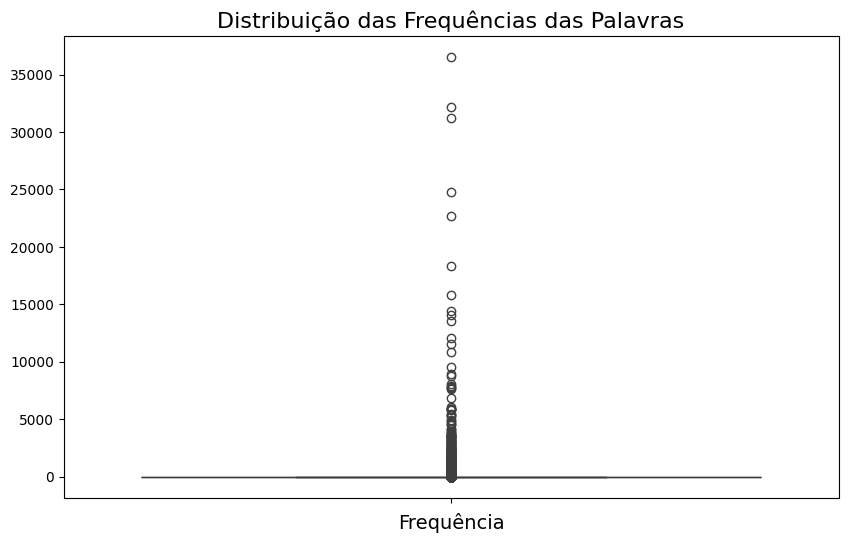

         count
palavra       
i        36556
the      32195
to       31185
a        24750
you      22664
and      18323
my       15821
for      14442
it       14088
is       13532
in       12095
of       11539
on       10841
im        9589
me        8935
that      8781
so        8097
just      7915
with      7835
good      7697
have      7668
be        6813
its       6076
day       5909
at        5898
love      5868
but       5854
are       5776
your      5443
was       5395
this      5367
get       5163
now       4899
all       4876
up        4704
like      4597
out       4480
not       4166
lol       4122
thanks    3970
do        3911
u         3764
going     3697
will      3653
new       3643
time      3600
today     3572
got       3533
go        3520
from      3506


In [ ]:
import seaborn as sns

frequencias = list(frequencia_palavras['count'])

quartis = frequencia_palavras.describe().reset_index()
print(quartis)
Q1 = int(quartis[quartis['index']=='25%']['count'])
Q3 = int(quartis[quartis['index']=='75%']['count'])
IQR = Q3 - Q1

# Limites para identificar outlier
limite_superior = Q3 + 1.5 * IQR

# Mostrar os quartis e limites
print(f"Quartil 1 (Q1): {Q1}")
print(f"Quartil 3 (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Limite Superior: {limite_superior}")

# Plotar o Boxplot das frequências
plt.figure(figsize=(10, 6))
sns.boxplot(y=frequencias)

# Adicionar título e rótulos
plt.title('Distribuição das Frequências das Palavras', fontsize=16)
plt.xlabel('Frequência', fontsize=14)

# Mostrar o gráfico
plt.show()

print(frequencia_palavras.head(50))

In [ ]:
frequencia_palavras = frequencia_palavras.reset_index()
frequencia_palavras=frequencia_palavras[(frequencia_palavras['count']>4) & (frequencia_palavras['count']<360)]
len(frequencia_palavras)

9873

In [ ]:
def remover_palavras(texto, palavras_para_remover):
    palavras = texto.split()  # Divide em palavras
    palavras_filtradas = [palavra if palavra in palavras_para_remover else '' for palavra in palavras]
    return " ".join(palavras_filtradas)

palavras_para_remover = set(list(frequencia_palavras['palavra']))
tweets_pretratados = [remover_palavras(tweet,palavras_para_remover) for tweet in tweets_pretratados]
tweets_pretratados



['chillin  beach     watchin  laker    enjoyin  cali weather',
 '    ure  ryan  indo version   compliment  ull   succes  ',
 '  brad  performance  subtitles  ',
 ' realized  matthew       second volume        ',
 ' meant      personal acct  ',
 'ftw     fuck  terminal ',
 ' chillin    dog   hunter',
 'mmmmmmm   moms pho  ',
 ' sushi ',
 'delicious ',
 '       folks promises     training ride',
 ' page     told      source told   ',
 'dam   alot ',
 '        planing   piss  dad ',
 '   person       yoko',
 '   ',
 '    permanent   incredibly appealing       doctor     ask  purple',
 'mitchel musso   cookies',
 'woke         ',
 ' darlin',
 ' sitting   sports bar       ohhhh     randomly    laughed',
 'male    ',
 '  definitely ',
 ' confessions   teenage drama queen ',
 'mixed     ringing round   f     thanx      ',
 ' knew ',
 '  idol worthy  envy       prettier   xoxo   ',
 '  ',
 'epic lols  ',
 'everytime   slumdog      ',
 ' updating     kitchen   ',
 'la  fucking      wednesday ',

In [ ]:
df['textos_tratados'] = tweets_pretratados
df['texto_tratado'] = df['textos_tratados'].apply(lambda x: ' '.join(x.split()))
df

,target,ids,date,flag,user,text,texto_salvo,textos_tratados,texto_tratado
1499999,4,2071031539,Sun Jun 07 18:43:02 PDT 2009,NO_QUERY,Osidegurl07,Chillin @ the beach with my girl brit-brit wat...,Chillin @ the beach with my girl brit-brit wat...,chillin beach watchin laker enjoyin ...,chillin beach watchin laker enjoyin cali weather
1500000,4,2071031696,Sun Jun 07 18:43:02 PDT 2009,NO_QUERY,MutiiMutii,@indraherlambang really wanna say that ure lik...,@indraherlambang really wanna say that ure lik...,ure ryan indo version compliment ull ...,ure ryan indo version compliment ull succes
1500001,4,2071031794,Sun Jun 07 18:43:03 PDT 2009,NO_QUERY,TroyBenedict,"@ambermac Gotta love Brad Pitt's performance, ...","@ambermac Gotta love Brad Pitt's performance, ...",brad performance subtitles,brad performance subtitles
1500002,4,2071031822,Sun Jun 07 18:43:03 PDT 2009,NO_QUERY,aligatorpop,Just realized that Matthew Sweet &amp; Susanna...,Just realized that Matthew Sweet &amp; Susanna...,realized matthew second volume,realized matthew second volume
1500003,4,2071031830,Sun Jun 07 18:43:05 PDT 2009,NO_QUERY,danamlewis,"@marksphone sorry, meant that to come from my ...","@marksphone sorry, meant that to come from my ...",meant personal acct,meant personal acct
...,...,...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...,woke,woke
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...,interviews,interviews
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...,mojo makeover ask details,mojo makeover ask details
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...,boo alll tupac,boo alll tupac


In [ ]:
df =df[df['texto_tratado']!='']
df

,target,ids,date,flag,user,text,texto_salvo,textos_tratados,texto_tratado
1499999,4,2071031539,Sun Jun 07 18:43:02 PDT 2009,NO_QUERY,Osidegurl07,Chillin @ the beach with my girl brit-brit wat...,Chillin @ the beach with my girl brit-brit wat...,chillin beach watchin laker enjoyin ...,chillin beach watchin laker enjoyin cali weather
1500000,4,2071031696,Sun Jun 07 18:43:02 PDT 2009,NO_QUERY,MutiiMutii,@indraherlambang really wanna say that ure lik...,@indraherlambang really wanna say that ure lik...,ure ryan indo version compliment ull ...,ure ryan indo version compliment ull succes
1500001,4,2071031794,Sun Jun 07 18:43:03 PDT 2009,NO_QUERY,TroyBenedict,"@ambermac Gotta love Brad Pitt's performance, ...","@ambermac Gotta love Brad Pitt's performance, ...",brad performance subtitles,brad performance subtitles
1500002,4,2071031822,Sun Jun 07 18:43:03 PDT 2009,NO_QUERY,aligatorpop,Just realized that Matthew Sweet &amp; Susanna...,Just realized that Matthew Sweet &amp; Susanna...,realized matthew second volume,realized matthew second volume
1500003,4,2071031830,Sun Jun 07 18:43:05 PDT 2009,NO_QUERY,danamlewis,"@marksphone sorry, meant that to come from my ...","@marksphone sorry, meant that to come from my ...",meant personal acct,meant personal acct
...,...,...,...,...,...,...,...,...,...
1599993,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha...","@Cliff_Forster Yeah, that does work better tha...",wonder,wonder
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...,woke,woke
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...,interviews,interviews
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...,mojo makeover ask details,mojo makeover ask details


In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score,  silhouette_samples
import numpy as np
import ast
from sklearn.decomposition import PCA


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(list(df['texto_tratado']))


In [ ]:
df['embeddings'] = embeddings.tolist()

df.to_csv('df_clusterizado.csv', index=False)

<ipython-input-22-f077d513c760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings.tolist()


In [ ]:
print(embeddings.max())
print(embeddings.min())
print(embeddings)

0.34431255
-0.2812436
[[-0.10778438 -0.03513048  0.1157496  ...  0.01019759 -0.09488183
   0.00833623]
 [-0.13917431 -0.0199328   0.01369921 ...  0.08092749 -0.03561372
  -0.00654475]
 [-0.03413661 -0.0234418  -0.03464964 ...  0.04033589 -0.00647234
  -0.08993399]
 ...
 [-0.07456484  0.0855884   0.01357565 ...  0.10031134 -0.03441243
   0.0221608 ]
 [-0.07064203  0.07705189 -0.01836922 ... -0.07208122  0.0227398
  -0.03546571]
 [ 0.02300736 -0.01964715  0.01283718 ... -0.04149855 -0.01671232
  -0.0359645 ]]


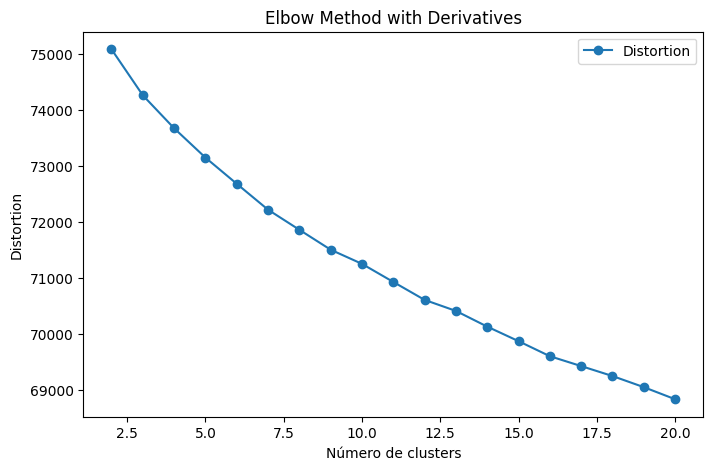

Inclinações (derivadas) entre os clusters: [821.8984375, 588.9765625, 524.0859375, 467.703125, 463.1953125, 358.5, 356.0703125, 252.5078125, 322.9296875, 320.671875, 197.078125, 280.2890625, 259.6875, 268.65625, 176.4140625, 177.609375, 198.5234375, 215.6953125]


In [ ]:
def plot_elbow_curve_with_derivatives(embeddings, max_clusters=20):
    distortions = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings)
        distortions.append(kmeans.inertia_)

    # Calcular as derivadas (inclinações) entre clusters
    derivatives = [(distortions[i] - distortions[i + 1]) for i in range(len(distortions) - 1)]

    # Plotar a curva
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), distortions, marker='o', label="Distortion")
    plt.title("Elbow Method with Derivatives")
    plt.xlabel("Número de clusters")
    plt.ylabel("Distortion")
    plt.legend()
    plt.show()

    return derivatives

# Calcular e retornar as inclinações
derivatives = plot_elbow_curve_with_derivatives(embeddings)
print("Inclinações (derivadas) entre os clusters:", derivatives)

[821.89, 588.9765625, 524.0859375, 467.70, 463.19, 358.5, 356.07, 252.50]

Acima temos uma lista de derivas de um cluster para o outro, vemos que a primeira mudança brusca do comportamento da reta para uma maior linearidade foi entre o cluster 7 e 8. Será nosso cotovlo.

Conclusão: Escolhemos 7 clusters por identificarmos que foi a primeira grande mudança de tendencia da curva e por querermos clusters mais genéricos.

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(embeddings)
cluster = kmeans.predict(embeddings)

In [ ]:
df['cluster'] = cluster


<ipython-input-28-d348a6a1b298>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster


In [ ]:
for x in df['cluster'].unique():
  df_temporario = df[df['cluster'] == x]
  palavras = []
  for tweet in df_temporario['texto_tratado']:
      palavras.extend(tweet.split())

  # Criar um DataFrame para contar a frequência de cada palavra
  df_palavras = pd.DataFrame(palavras, columns=["palavra"])
  frequencia_palavras = df_palavras["palavra"].value_counts()
  frequencia_palavras = pd.DataFrame(frequencia_palavras, columns=["count"]).reset_index()

  # Exibir o dicionário
  print('Cluster: ' + str(x))
  print(list(frequencia_palavras['palavra'].head(100)))
  print('\n')

Cluster: 4
['weather', 'beach', 'trip', 'rain', 'weeks', 'outside', 'visit', 'city', 'bday', 'july', 'saturday', 'afternoon', 'st', 'london', 'sunday', 'wednesday', 'tuesday', 'june', 'evening', 'vacation', 'tour', 'hour', 'thursday', 'sunny', 'holiday', 'park', 'meeting', 'month', 'camp', 'tickets', 'town', 'raining', 'heading', 'gym', 'enjoying', 'walk', 'shopping', 'la', 'shower', 'concert', 'bring', 'flight', 'taking', 'pool', 'season', 'planning', 'ride', 'date', 'airport', 'august', 'graduation', 'months', 'sunshine', 'holidays', 'office', 'pm', 'years', 'nyc', 'sitting', 'lake', 'road', 'leave', 'run', 'leaving', 'room', 'class', 'plan', 'vegas', 'near', 'hotel', 'exciting', 'stay', 'mondays', 'minutes', 'til', 'packing', 'safe', 'bike', 'car', 'kids', 'rest', 'wedding', 'couple', 'swimming', 'warm', 'nights', 'hoping', 'seeing', 'plans', 'street', 'half', 'driving', 'move', 'relaxing', 'york', 'cold', 'rainy', 'san', 'chicago', 'super']


Cluster: 3
['lmao', 'hate', 'lakers', '

Analisando o contexto de cada cluster e suas principais palavras, podemos coniderar que o cada cluster tem um "tema" apartir das palavras mais epecíficas de cada cluster:

#Cluster 4
Contexto: Viagens e Atividades ao Ar Livre.
Palavras como "beach", "trip", "vacation", "sunny", "airport", "holiday", "august", "swimming", "london", "lake", "park" e "tour" sugerem um tema relacionado a viagens, clima e atividades ao ar livre.

#Cluster 3
Contexto: Emoções e Conversas Cotidianas.
Palavras como "hate", "mind", "head", "damn", "laugh", "care", "hell", "fuck", "sad", "aww", "wrong", "proud", "sleeping" e "fine" indicam um cluster focado em emoções, opiniões e expressões pessoais cotidianas.

#Cluster 6
Contexto: Entretenimento e Cultura Pop.
Palavras como "songs", "rock", "movies", "concert", "fan", "season", "episode", "guitar", "disney", "radio", "dance" e "youtube" apontam para um tema de música, filmes, televisão e cultura pop.

#Cluster 0
Contexto: Comida e Bebidas.
Palavras como "breakfast", "tea", "chocolate", "pizza", "cake", "drinks", "cooking", "wine", "salad", "burger", "bacon", "cookies" e "ice cream" claramente sugerem um foco em comida e bebidas.

#Cluster 2
Contexto: Tecnologia e Redes Sociais.
Palavras como "facebook", "email", "website", "online", "internet", "profile", "app", "google", "photos", "laptop", "tweeting" e "media" sugerem um tema relacionado a tecnologia, redes sociais e comunicação digital.

#Cluster 1
Contexto: Interações Pessoais e Conversações.
Palavras como "aww", "fine", "agree", "congratulations", "dear", "hugs", "thankyou", "sweetie", "exciting", "hoping", "update" e "works" apontam para um cluster focado em interações pessoais, emoções positivas e respostas.

#Cluster 5
Contexto: Tarefas e Rotina.
Palavras como "vote", "class", "homework", "question", "office", "meeting", "starting", "running", "plan", "team", "interview" e "learning" sugerem um tema de trabalho, estudos e atividades rotineiras.



In [4]:
df = pd.read_csv('df_clusterizado (3).csv', encoding='latin-1')
embeddings = np.array([ast.literal_eval(vec) for vec in df['embeddings'].tolist()])
embeddings_salvo = embeddings

In [5]:
embeddings = embeddings_salvo
pca = PCA(n_components=5)
embeddings = pca.fit_transform(embeddings)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
embeddings = scaler.fit_transform(embeddings)

In [7]:
embeddings


array([[0.35140432, 0.75664186, 0.41740108, 0.44558166, 0.18551295],
       [0.4342884 , 0.65166984, 0.67356724, 0.27909259, 0.48421576],
       [0.34846092, 0.70789367, 0.45863302, 0.32601298, 0.71793448],
       ...,
       [0.61109173, 0.42149493, 0.33789157, 0.52379377, 0.65980976],
       [0.37813687, 0.58458164, 0.50177414, 0.34081086, 0.60211537],
       [0.46984577, 0.83419875, 0.62394445, 0.35233374, 0.55713658]])

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
import ast
from sklearn.utils import resample
import random
from sklearn.neighbors import NearestNeighbors

def calculate_silhouette_kmeans(embeddings):
  max_clusters = 10
  fig, axes = plt.subplots((max_clusters - 1) // 2, 2, figsize=(15, 20))
  axes = axes.flatten()  # Garantindo uma iteração direta pelos subplots

  # Iterando sobre os números de clusters
  for n_clusters, ax in zip(range(2, max_clusters + 1), axes):
      model = KMeans(n_clusters=n_clusters, random_state=42)
      visualizer = SilhouetteVisualizer(model, ax=ax)
      visualizer.fit(embeddings)
      visualizer.finalize()

  # Ajusta espaçamentos e exibe
  plt.tight_layout()
  plt.show()


def dbscan_with_silhouette(X_scaled):
    eps_values = np.arange(0.1, 1.0, 0.2)
    sil_scores = []
    indices = np.random.choice(X_scaled.shape[0], size=10000, replace=False)
    X_scaled = X_scaled[indices]

    # Plotando o Silhouette Score para diferentes valores de eps
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=10)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Ignorar rótulos -1 (ruído) para cálculo do silhueta
        if len(set(dbscan_labels)) > 1:  # Verifica se há pelo menos 2 clusters
            score = silhouette_score(X_scaled, dbscan_labels)
            sil_scores.append(score)
        else:
            sil_scores.append(-1)  # Caso não haja clusters suficientes

    # Plotando o Silhouette Score para diferentes valores de eps
    plt.plot(eps_values, sil_scores)
    plt.xlabel('Valor de eps')
    plt.ylabel('Silhouette Score')
    plt.title('Avaliação do Silhouette Score para diferentes valores de eps')
    plt.show()

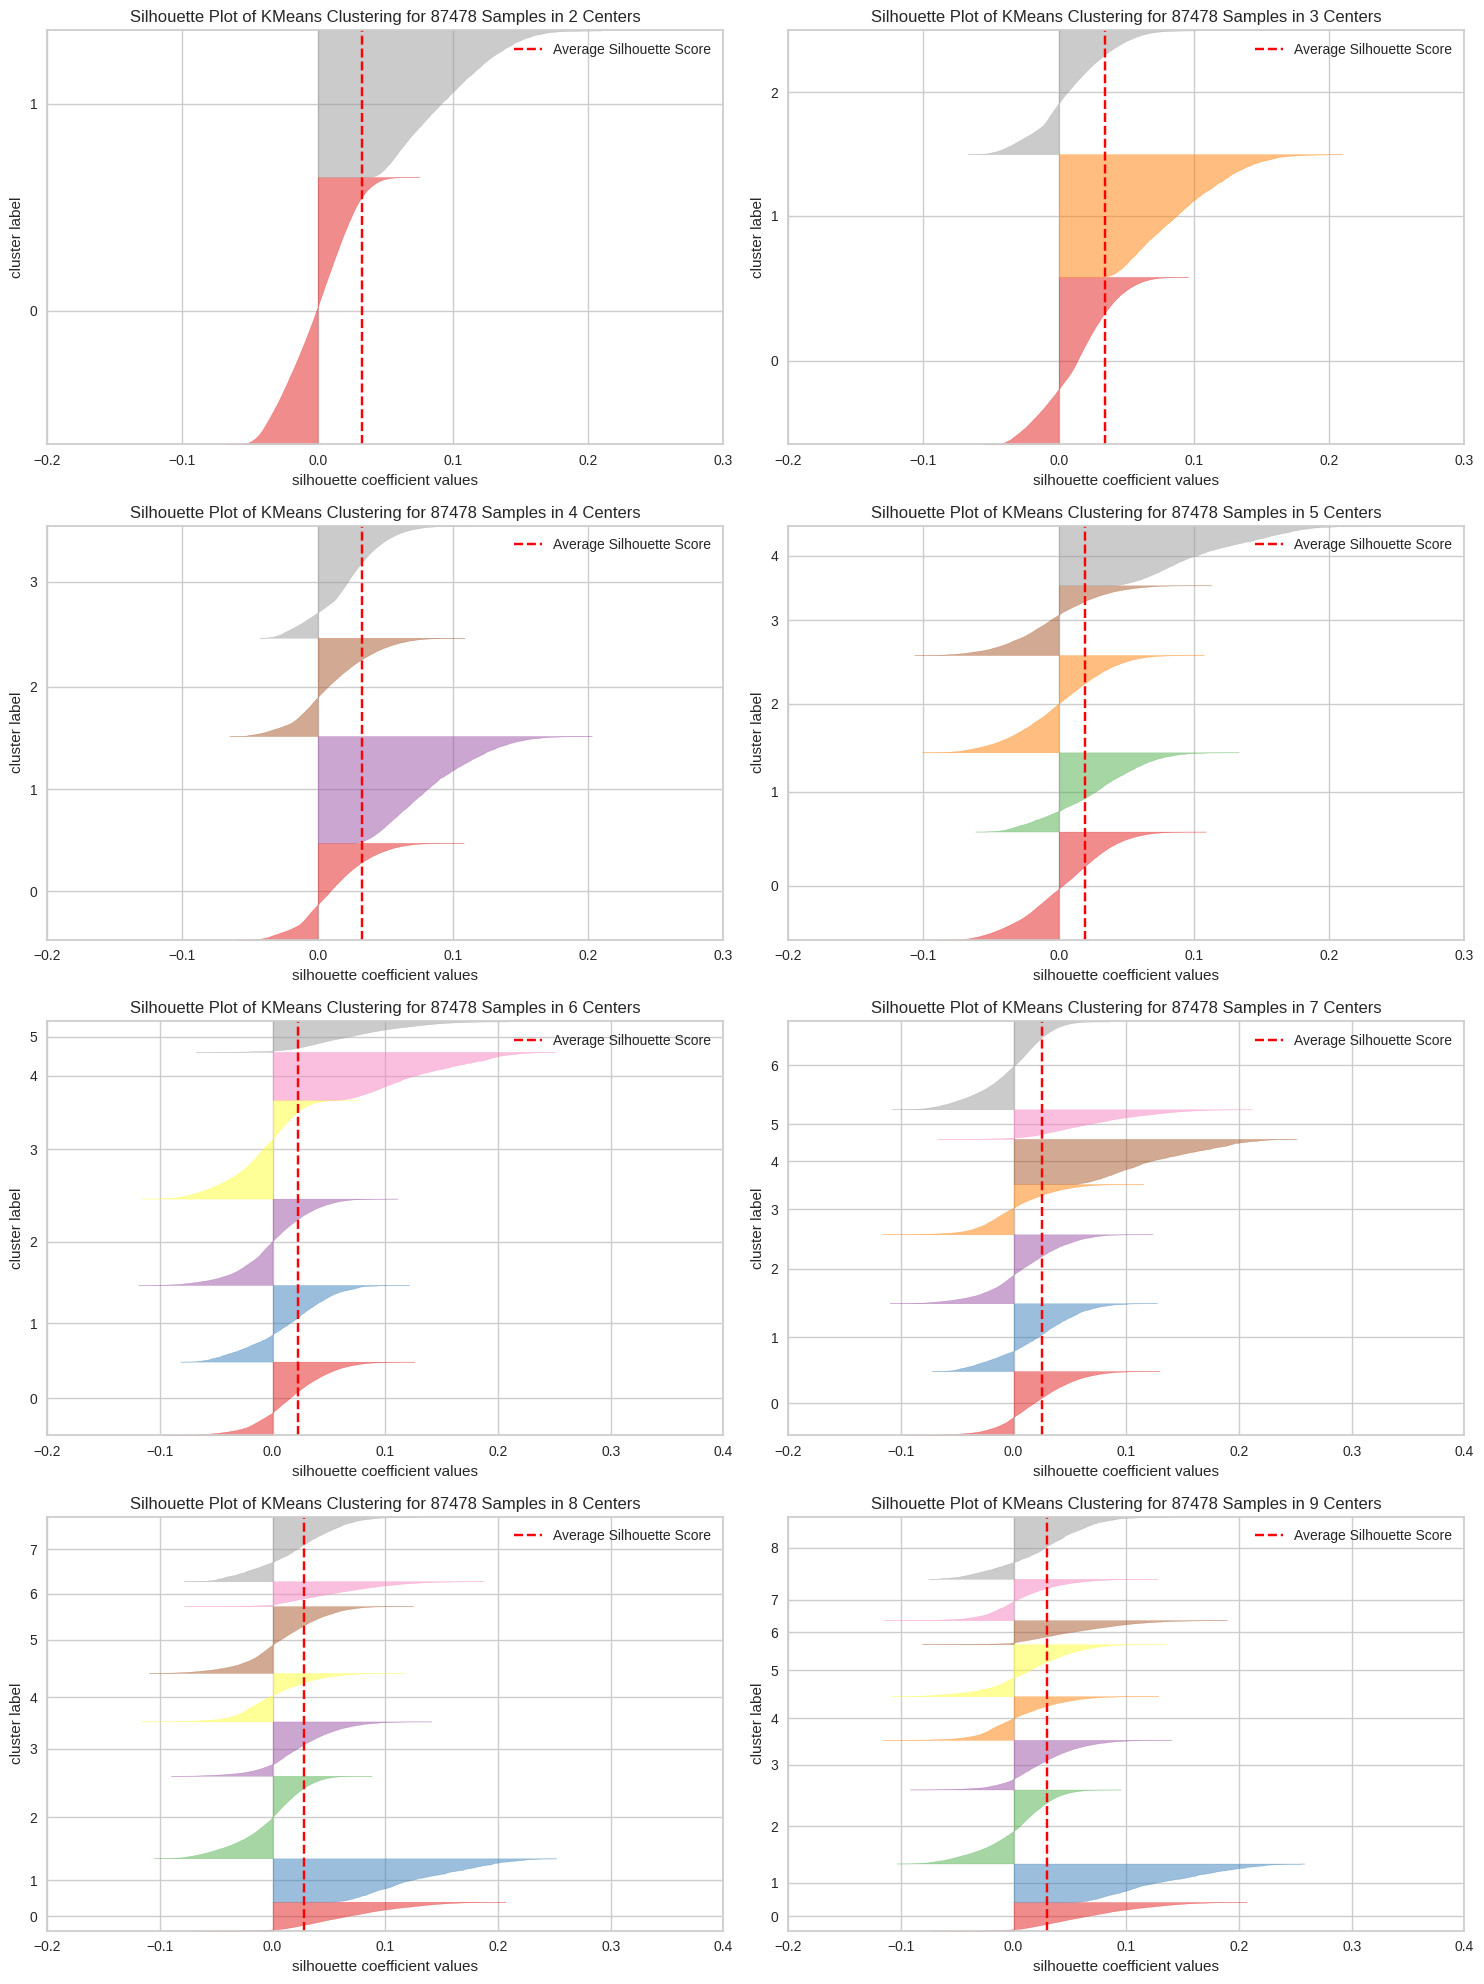

In [9]:
calculate_silhouette_kmeans(embeddings)

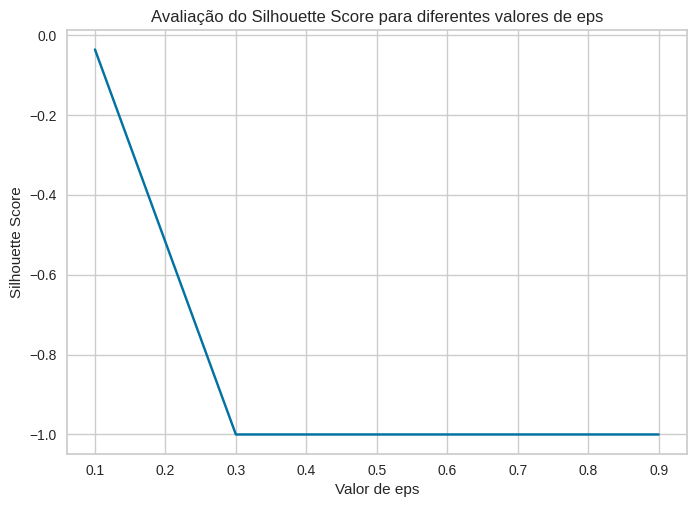

In [21]:
dbscan_scores = dbscan_with_silhouette(embeddings)

In [10]:
from sklearn.metrics import v_measure_score
import numpy as np
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

# K-Médias
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(embeddings)
labels_kmeans = kmeans.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
labels_dbscan = dbscan.fit_predict(embeddings)

# Índice de Dunn otimizado
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    if -1 in unique_labels:  # Remover outliers (DBSCAN)
        unique_labels = unique_labels[unique_labels != -1]

    # Calcula as médias dos clusters
    centroids = np.array([X[labels == label].mean(axis=0) for label in unique_labels])

    # Distâncias intracluster: máxima distância em cada cluster
    intra_cluster_distances = [
        max(euclidean(point, centroids[label]) for point in X[labels == label])
        for label in unique_labels
    ]

    # Distâncias intercluster: mínima distância entre centros
    inter_cluster_distances = [
        euclidean(centroids[i], centroids[j])
        for i in range(len(unique_labels))
        for j in range(i + 1, len(unique_labels))
    ]

    return min(inter_cluster_distances) / max(intra_cluster_distances)

# Calcular Índice de Dunn
dunn_kmeans = dunn_index(embeddings, labels_kmeans)
dunn_dbscan = dunn_index(embeddings, labels_dbscan)

print(f"Índice de Dunn para K-Médias: {dunn_kmeans}")
print(f"Índice de Dunn para DBSCAN: {dunn_dbscan}")

# Coeficiente de V-Measure
v_measure_kmeans = v_measure_score(labels_kmeans, labels_kmeans)  # Substitua pelo ground truth se disponível
v_measure_dbscan = v_measure_score(labels_kmeans, labels_dbscan)  # Substitua pelo ground truth se disponível

print(f"Coeficiente de V-Measure para K-Médias: {v_measure_kmeans}")
print(f"Coeficiente de V-Measure para DBSCAN: {v_measure_dbscan}")


Índice de Dunn para K-Médias: 0.43382466284077875
Índice de Dunn para DBSCAN: 0.08778039527122726
Coeficiente de V-Measure para K-Médias: 1.0
Coeficiente de V-Measure para DBSCAN: 0.18177361229593028
